## Medidas de dispersion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = np.array([1,2,3,4,56,8,100,2])
data

array([  1,   2,   3,   4,  56,   8, 100,   2])

In [3]:
data.min()

1

In [4]:
data.max()

100

In [5]:
rango = data.max() - data.min()
rango

99

In [7]:
varianza = data.var()
varianza

1170.25

In [8]:
desviacion_estandar = data.std()
desviacion_estandar

34.20891696619465

In [10]:
serie1 = pd.Series(data)
serie1

0      1
1      2
2      3
3      4
4     56
5      8
6    100
7      2
dtype: int32

In [13]:
serie1.describe()

count      8.000000
mean      22.000000
std       36.570871
min        1.000000
25%        2.000000
50%        3.500000
75%       20.000000
max      100.000000
dtype: float64

# Ejemplo aplicado

In [3]:
df = pd.read_csv('./data/cars.csv')
df.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,True,632


In [4]:
# Desviacion estandar
df['price_usd'].std()

6428.1520182029035

In [5]:
# Rango = valor_max - valor_min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [9]:
# Quartiles
median = df['price_usd'].median()
# quantile(q=0.25) // 25%
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)

# q=0 primer valor
# q=1.0 100%
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

print("min_val >", min_val)
print("Q1 >", Q1)
print("median >", median)
print("Q3 >", Q3)
print("max_val >", max_val)

min_val > 1.0
Q1 > 2100.0
median > 4800.0
Q3 > 8990.0
max_val > 50000.0


In [10]:
# Rango intercuartil
IQR = Q3 - Q1
IQR

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

Permite identificar el rango por el cual si se sobrepasa el minimo o el maximo deberia considerarse un Outlier

In [13]:
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
print('rango para detección de outliers: {}, {}'.format(min_limit, max_limit))

rango para detección de outliers: -8235.0, 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

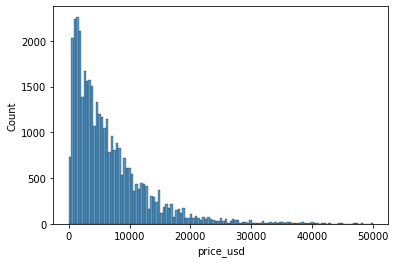

In [16]:
# Histograma
sns.histplot(df['price_usd'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_usd'>

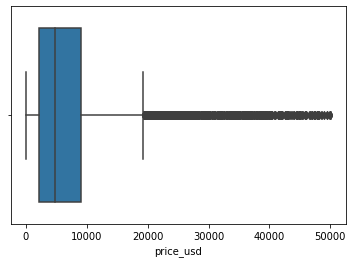

In [17]:
# Diagrama de Bigotes o Caja
sns.boxplot(df['price_usd'])

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

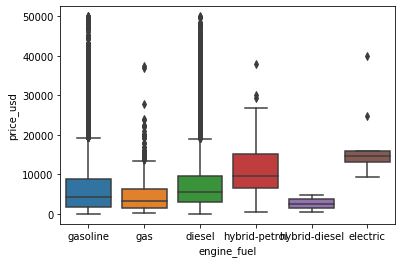

In [18]:
# Grafico de caja para valores categoricos
# x // valores categoricos
# y // valores numericos
# data // valores del df
sns.boxplot(x = 'engine_fuel', y='price_usd', data=df)
